In [112]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import glob
import time
warnings.filterwarnings('ignore')

data = pd.read_csv('/Users/mattjohnson/Desktop/Python 2018/Untitled Folder/SisFall/big_acm_data.csv')
data = data.drop('Unnamed: 0', axis=1)

In [113]:
subjects = ['SA01','SA02','SA03','SA04','SA05','SA06','SA07','SA08','SA09','SA10','SA11','SA12','SA13','SA14','SA15',
 'SA16','SA17','SA18','SA19','SA20','SA21','SA22', 'SA23','SE0','SE1','SE2','SE3','SE4','SE5','SE6','SE7','SE8','SE9',
 'SE10','SE11','SE12','SE13','SE14','SE15']
dailies = ['D01','D02','D03','D04','D05','D06','D07','D08','D09','Da10','D11','D12','D13','D14','D15',
 'D16','D17','D18','D19']
falls = ['F01','F02','F03','F04','F05','F06','F07','F08','F09','F10','F11','F12','F13','F14','F15']
#activ_label = {'STD':1,'WAL':2,'JOG':3,'JUM':4,'STU':5,'STN':6,'SCH':7,'SIT':8,'CHU':9,'CSI':10,'CSO':11,
#'LYI':12,'FOL':0,'FKL':0,'BSC':0,'SDL':0}
#Label = {0:'Fall',1:'Stand',2:'Walk',3:'Jog',4:'Jump',5:'up_stair',6:'down_stair',
#         7:'stand2sit',8:'sitting',9:'sit2stand',10:'CSI',11:'CSO',12:'LYI'}

In [114]:
data.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,activity,subject,trial,filename
0,9,-18,240,-12,74,-2,45,-77,1042,D14,SE11,R01,D14_SE11_R01.txt
1,9,-23,241,-14,73,-1,45,-80,1044,D14,SE11,R01,D14_SE11_R01.txt
2,9,-19,241,-13,73,-2,45,-78,1046,D14,SE11,R01,D14_SE11_R01.txt
3,8,-20,243,-15,71,-2,47,-78,1047,D14,SE11,R01,D14_SE11_R01.txt
4,8,-22,241,-14,69,-2,44,-83,1048,D14,SE11,R01,D14_SE11_R01.txt


In [120]:
subjectList = list(df['subject'].value_counts().index)
trialList = list(df['trial'].value_counts().index)
activityList = list(df['activity'].value_counts().index)

In [184]:
start = time.time()
df = data.copy()
combinationList = []

i=0
for s,t,a in zip(subjectList, trialList, activityList):
    tempdf = df[ (df['subject']==s) & (df['trial']==t) & (df['activity']==a)]
    
    if len(tempdf) != 0:
        combinationList.append(tempdf)
        print('appending')

print(len(combinationList))
print ('Completed... It took', time.time()-start, 'seconds.')

KeyError: 'subject'

In [127]:
print( len(subjectList)*len(trialList)*len(activityList) )
print(7752/25)
print(310*24/60)

7752
310.08
124.0


In [142]:
#tests if indexes of a dataframe are consecutive, returns boolean, prints message
def test_if_consecutive(dataframe):
    hopefully_ones = pd.DataFrame(dataframe.index).diff()
    t1 = int(hopefully_ones[0][1:].sum())
    t2 = len(hopefully_ones)-1
    
    if t1 == t2:
        print('Passed consecutive test.')
        return True
    else:
        print('Contains non-consecutive data!')
        return False

test_if_consecutive(combinationList[1])

Passed consecutive test.


True

In [163]:
curr_df = combinationList[1].copy()

if not test_if_consecutive(curr_df):
    print('abort')
# passed consec test.. now...

# seperate numeric and categorical
num_df = curr_df[['x1', 'y1', 'z1']]
supp_df = curr_df[['activity', 'subject', 'trial']]

Passed consecutive test.


In [166]:
5000/200

25.0

In [182]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 4
fs = 200.0       # sample rate, Hz
cutoff = 5.0  # desired cutoff frequency of the filter, Hz

In [170]:
filter_df = num_df.copy()

for col in filter_df.columns:
    filter_df[col] = butter_lowpass_filter(filter_df[col], cutoff, fs, order)

In [177]:
supp_df.head()

,activity,subject,trial
12766357,D17,SA01,R05
12766358,D17,SA01,R05
12766359,D17,SA01,R05
12766360,D17,SA01,R05
12766361,D17,SA01,R05


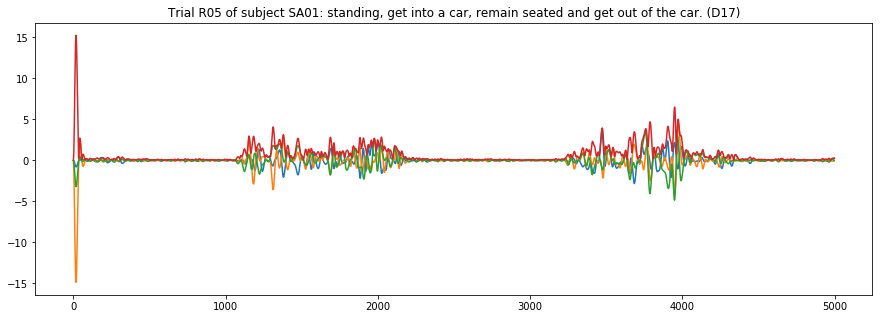

In [181]:
# differential/ removing bias
diff_df = filter_df.diff()[1:]
diff_df['A'] = diff_df.apply(lambda row: np.sqrt( row.iloc[0]**2 + row.iloc[1]**2 + row.iloc[2]**2).round(3) , axis=1)
diff_df.head()

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(111)
ax.plot(diff_df.reset_index(drop=True));
ax.set_title('Trial R05 of subject SA01: standing, get into a car, remain seated and get out of the car. (D17)');
# possibly set x axis to seconds (200hz, 5 seconds)

In [183]:
len(combinationList)

2

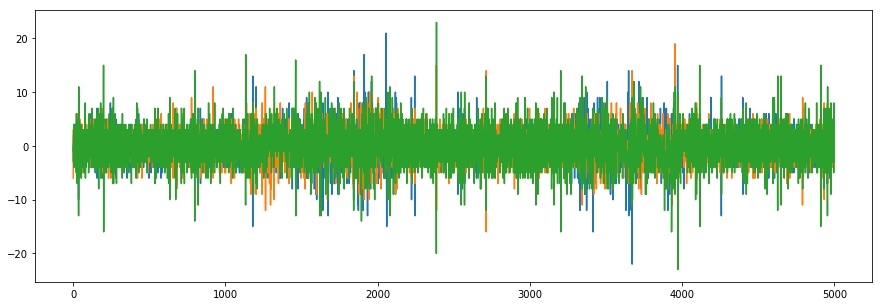

In [161]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(111)
#ax2 = f.add_subplot(312)
#ax3 = f.add_subplot(313)
diffy['A'] = diffy.apply(lambda row: np.sqrt( row.iloc[0]**2 + row.iloc[1]**2 + row.iloc[2]**2).round(3) , axis=1)

ax.plot(diffy[['x1', 'y1', 'z1']].reset_index(drop=True))
#ax2.plot(df2[['x2', 'y2', 'z2', 'A']]);
#ax3.plot(df3[['x3', 'y3', 'z3', 'A']]);
plt.subplots_adjust(hspace=0.5)

In [116]:
start = time.time()

df = data.copy()

fall_jog_list = []

for s in df['subject'].value_counts().index:
    for t in df['trial'].value_counts().index:
        for a in df['activity'].value_counts().index:
            tempdf = df[ (df['subject']==s) & (df['trial']==t) & (df['activity']==a)]
            ## put in code to not append if len = 0
            if len(tempdf) != 0:
                fall_jog_list.append(tempdf)
        break # temp
        
print(len(fall_jog_list))
print ('Completed... It took', time.time()-start, 'seconds.')

0
Completed... It took 4392.98743891716 seconds.


[]

In [103]:
hopefully_ones = pd.DataFrame(templist[0].index).diff()

print('sum',sum(hopefully_ones[0]))
print('len',len(hopefully_ones), '\n')
hopefully_ones[0].value_counts()

hdf = hopefully_ones[ hopefully_ones[0]>1 ]

outOfOrderList = list( hdf.index )

print('relevant indices:')
for thing in outOfOrderList:
    x = int(thing)
    print(x)
    

sum nan
len 168800 

relevant indices:
11405
55604
62803
98203
146001
157400


In [111]:
hdf.iloc[0]
hopefully_ones.iloc[11404-10:11404+10]
A = templist[0]
len(A)
A[11404-10:11404+10]

,x1,y1,z1,x2,y2,z2,x3,y3,z3,activity,subject,trial,filename
15397926,264,14,-8,-46,17,-6,1000,49,102,F07,SA07,R01,F07_SA07_R01.txt
15397927,265,15,-7,-46,19,-7,1003,45,101,F07,SA07,R01,F07_SA07_R01.txt
15397928,262,13,-7,-43,20,-7,995,48,99,F07,SA07,R01,F07_SA07_R01.txt
15397929,265,15,-7,-43,22,-6,994,50,103,F07,SA07,R01,F07_SA07_R01.txt
15397930,264,16,-6,-44,24,-8,1001,51,99,F07,SA07,R01,F07_SA07_R01.txt
15397931,266,15,-4,-43,24,-8,998,53,107,F07,SA07,R01,F07_SA07_R01.txt
15397932,264,15,-7,-43,24,-6,1001,50,103,F07,SA07,R01,F07_SA07_R01.txt
15397933,266,17,-6,-42,24,-7,1000,50,102,F07,SA07,R01,F07_SA07_R01.txt
15397934,264,14,-7,-43,22,-6,1004,49,99,F07,SA07,R01,F07_SA07_R01.txt
15397935,263,17,-4,-45,21,-7,1011,50,103,F07,SA07,R01,F07_SA07_R01.txt


In [ ]:
A.head()

In [65]:
for entry in templist: # F05
    try:
        print(entry['subject'].value_counts().index[0], ' ', entry['trial'].value_counts().index[0])
    except:
        print()

SA07   R01
SA07   R05
SA07   R03
SA07   R04
SA07   R02
SA01   R01
SA01   R05
SA01   R03
SA01   R04
SA01   R02
SA02   R01
SA02   R05
SA02   R03
SA02   R04
SA02   R02
SA21   R01
SA21   R05
SA21   R03
SA21   R04
SA21   R02
SA23   R01
SA23   R05
SA23   R03
SA23   R04
SA23   R02
SA04   R01
SA04   R05
SA04   R03
SA04   R04
SA04   R02
SE06   R01
SE06   R05
SE06   R03
SE06   R04
SE06   R02
SA16   R01
SA16   R05
SA16   R03
SA16   R04
SA16   R02
SA18   R01
SA18   R05
SA18   R03
SA18   R04
SA18   R02
SA08   R01
SA08   R05
SA08   R03
SA08   R04
SA08   R02
SA05   R01
SA05   R05
SA05   R03
SA05   R04
SA05   R02
SA13   R01
SA13   R05
SA13   R03
SA13   R04
SA13   R02
SA03   R01
SA03   R05
SA03   R03
SA03   R04
SA03   R02
SA10   R01
SA10   R05
SA10   R03
SA10   R04
SA10   R02
SA12   R01
SA12   R05
SA12   R03
SA12   R04
SA12   R02
SA09   R01
SA09   R05
SA09   R03
SA09   R04
SA09   R02
SA11   R01
SA11   R05
SA11   R03
SA11   R04
SA11   R02
SA06   R01
SA06   R05
SA06   R03
SA06   R04
SA06   R02
SA19   R01

In [185]:
class MovingAverageFilter(object):
    
    def __init__(self, window):
        self.window = window
        self.data = []
        
    def step(self, measurement):
        self.data.append(measurement)
        if len(self.data)>self.window:
            self.data.pop(0)
    
    def current_state(self):
        return sum(self.data)/len(self.data)

In [198]:
class SingleStateKalmanFilter(object):
    
    def __init__(self, A, B, C, x, P, Q, R):
        self.A = A # process dynamics
        self.B = B # control dynamics
        self.C = C # measurement dynamics
        self.current_state_estimate = x # current state est
        self.current_prob_estimate = P # current prob. of state est
        self.Q = Q
        self.R = R
        
    def current_state(self):
        return self.current_state_estimate
    
    def step(self, control_input, measurement):
        # Prediction step
        predicted_state_estimate = self.A * self.current_state_estimate + self.B * control_input
        predicted_prob_estimate = (self.A * self.current_prob_estimate) * self.A + self.Q
        
        # Observation step
        innovation = measurement - self.C * predicted_state_estimate
        innovation_covariance = self.C * predicted_prob_estimate * self.C + self.R
        
        # Update step
        kalman_gain = predicted_prob_estimate * self.C * 1 /float(innovation_covariance)
        self.current_state_estimate = predicted_state_estimate + kalman_gain * innovation
        
        # eye(n) = nxn ident
        self.current_prob_estimate = (1 - kalman_gain * self.C) * predicted_prob_estimate

In [199]:
# Initialize Kalman Filter
A = 1 # no process innovation
C = 1 # measurement
B = 0 # no control input
Q = 0.005 # process covariance
R = 1 # measurement covariance
x = 20 # initial estimate
P = 1 # initial covariance

filter = SingleStateKalmanFilter(A, B, C, x, P, Q, R)

# Initialize two moving avg filters with diff. window lengths
ma25 = MovingAverageFilter(25)
ma200 = MovingAverageFilter(200)

In [200]:
my_df = templist[0][['x1', 'y1', 'z1']]

# Empty lists for capturing filter estimates
predictions = []
wavg25 = []
wavg200 = []

# Simulate the data arriving sequentially
for data in my_df['x1']:
    ma25.step(data)
    wavg25.append(ma25.current_state())
    
    ma200.step(data)
    wavg200.append(ma200.current_state())

    filter.step(0, data)
    predictions.append(filter.current_state())
    

In [210]:
my_df2 = pd.concat([my_df['x1'].reset_index(drop=True), pd.Series(predictions)], axis=1)
my_df2.columns = ['x1', 'prediction']
my_df2.head()

my_df3 = pd.concat([my_df2.reset_index(drop=True), pd.Series(wavg200)], axis=1)
my_df3.columns = ['x1', 'prediction', 'wavg200']
my_df3.head()

,x1,prediction,wavg200
0,22,21.002494,22.000000
1,20,20.665557,21.000000
2,23,21.259305,21.666667
3,23,21.617775,22.000000
4,26,22.381122,22.800000


In [218]:
dfcopy = my_df.copy()
print(len(dfcopy))
dfcopy['rolling200'] = dfcopy['y1'].rolling(200).mean()
dfcopy['feat4'] = dfcopy['y1'] - dfcopy['rolling200']

168800


In [221]:
dfcopy['feat4'] = dfcopy['y1'] - dfcopy['rolling200']

In [224]:
#dfcopy['max200'] = dfcopy[['x1', 'y1', 'z1']]

dfcopy['A'] = dfcopy.apply(lambda row: np.sqrt( row.iloc[0]**2 + row.iloc[1]**2 + row.iloc[2]**2).round(3) , axis=1)
dfcopy.head()

,x1,y1,z1,rolling200,feat4,A
15386532,22,-253,-83,NaN,NaN,267.174
15386533,20,-257,-83,NaN,NaN,270.810
15386534,23,-256,-82,NaN,NaN,269.794
15386535,23,-256,-80,NaN,NaN,269.193
15386536,26,-256,-86,NaN,NaN,271.308


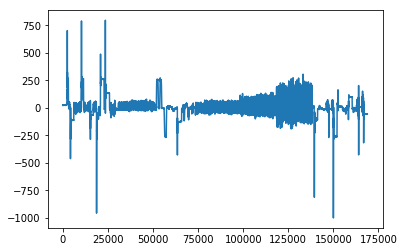

In [214]:
plt.plot(my_df3['prediction']);

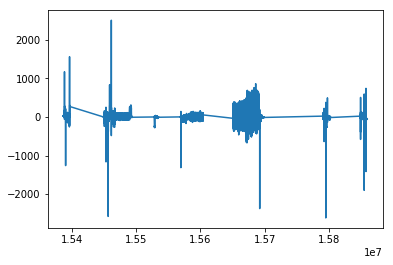

In [201]:
plt.plot(my_df['x1'])